# Kebakaran Hutan

In [ ]:
import pandas as pd
df = pd.read_excel('/content/mergedKML_1620722188962.xlsx')
df

,name,ExtendedData/Data/0/value,ExtendedData/Data/0/_name,ExtendedData/Data/1/value,ExtendedData/Data/1/_name,ExtendedData/Data/2/value,ExtendedData/Data/2/_name,ExtendedData/Data/3/value,ExtendedData/Data/3/_name,ExtendedData/Data/4/value,ExtendedData/Data/4/_name,ExtendedData/Data/5/value,ExtendedData/Data/5/_name,ExtendedData/Data/6/value,ExtendedData/Data/6/_name,ExtendedData/Data/7/value,ExtendedData/Data/7/_name,ExtendedData/Data/8/value,ExtendedData/Data/8/_name,ExtendedData/Data/9/value,ExtendedData/Data/9/_name,ExtendedData/Data/10/value,ExtendedData/Data/10/_name,ExtendedData/Data/11/value,ExtendedData/Data/11/_name,ExtendedData/Data/12/value,ExtendedData/Data/12/_name,ExtendedData/Data/13/value,ExtendedData/Data/13/_name,ExtendedData/Data/14/value,ExtendedData/Data/14/_name,longitude,latitude
0,Point1,Point1,name,#pnt11,styleUrl,-f9b7945,styleHash,2016-12-21 07:05:00,wib_datetime,1.375690,latitude,99.271439,longitude,"1°22'32.484""N 99°16'17.180""E",coordinat,Sumatera Utara,provinsi,Kota Padangsidimpuan,kabupaten,Padang Sidempuan Utara,kecamatan,Batang Ayumi Julu,desa,LPN-MODIS,satellite,0,brightness,37,confidence,1,visibility,99.271439,1.375690
1,Point2,Point2,name,#pnt16,styleUrl,48ee2524,styleHash,2016-12-16 03:54:00,wib_datetime,2.922743,latitude,99.675468,longitude,"2°55'21.875""N 99°40'31.685""E",coordinat,Sumatera Utara,provinsi,Asahan,kabupaten,Air Batu,kecamatan,Perk Sei Dadap I/ii,desa,LPN-MODIS,satellite,0,brightness,63,confidence,1,visibility,99.675468,2.922743
2,Point3,Point3,name,#pnt16,styleUrl,48ee2524,styleHash,2016-12-16 03:54:00,wib_datetime,3.556941,latitude,98.878708,longitude,"3°33'24.988""N 98°52'43.349""E",coordinat,Sumatera Utara,provinsi,Deliserdang,kabupaten,Pagar Marbau,kecamatan,Pagar Marbau Ii,desa,LPN-MODIS,satellite,0,brightness,48,confidence,1,visibility,98.878708,3.556941
3,Point1,Point1,name,#pnt27,styleUrl,-47a20286,styleHash,2017-12-05 03:45:00,wib_datetime,1.775599,latitude,99.715378,longitude,"1°46'32.158""N 99°42'55.360""E",coordinat,Sumatera Utara,provinsi,Labuhan Batu Selatan,kabupaten,Sungai Kanan,kecamatan,Marsonja,desa,LPN-MODIS,satellite,0,brightness,51,confidence,1,visibility,99.715378,1.775599
4,Point2,Point2,name,#pnt22,styleUrl,5fd45f11,styleHash,2017-12-10 04:00:00,wib_datetime,2.983376,latitude,99.618454,longitude,"2°59'0.154""N 99°37'6.434""E",coordinat,Sumatera Utara,provinsi,Asahan,kabupaten,Kisaran Barat,kecamatan,Mekar Baru,desa,LPN-MODIS,satellite,0,brightness,41,confidence,1,visibility,99.618454,2.983376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3041,Point3,Point3,name,#pnt4,styleUrl,-464accd3,styleHash,2020-11-27 13:36:00,wib_datetime,2.094989,latitude,99.827301,longitude,"2°5'41.961""N 99°49'38.284""E",coordinat,Sumatera Utara,provinsi,Labuhanbatu,kabupaten,Rantau Utara,kecamatan,Kartini,desa,LPN-MODIS,satellite,0,brightness,79,confidence,1,visibility,99.827301,2.094989
3042,Point1,Point1,name,#pnt26,styleUrl,-5980b9e0,styleHash,2019-10-06 03:54:00,wib_datetime,1.306415,latitude,99.698883,longitude,"1°18'23.093""N 99°41'55.979""E",coordinat,Sumatera Utara,provinsi,Padang Lawas,kabupaten,Sosopan,kecamatan,Siundol Jae,desa,LPN-MODIS,satellite,0,brightness,73,confidence,1,visibility,99.698883,1.306415
3043,Point2,Point2,name,#pnt12,styleUrl,3938ab6b,styleHash,2019-10-20 04:06:00,wib_datetime,2.092764,latitude,99.826790,longitude,"2°5'33.950""N 99°49'36.443""E",coordinat,Sumatera Utara,provinsi,Labuhanbatu,kabupaten,Rantau Utara,kecamatan,Kartini,desa,LPN-MODIS,satellite,0,brightness,56,confidence,1,visibility,99.826790,2.092764
3044,Point3,Point3,name,#pnt29,styleUrl,-3994ed0,styleHash,2019-10-03 06:16:00,wib_datetime,2.966981,latitude,99.069565,longitude,"2°58'1.131""N 99°4'10.433""E",coordinat,Sumatera Utara,provinsi,Kota Pematangsiantar,kabupaten,Siantar Timur,kecamatan,Pahlawan,desa,LPN-MODIS,satellite,0,brightness,34,confidence,1,visibility,99.069565,2.966981


Data Cleaning

In [ ]:
df_0 = df.rename(columns={'ExtendedData/Data/3/value':'wib_datetime', 'ExtendedData/Data/6/value':'coordinat', 'ExtendedData/Data/7/value':'provinsi', 'ExtendedData/Data/8/value':'kabupaten', 'ExtendedData/Data/9/value':'kecamatan', 'ExtendedData/Data/10/value':'desa', 'ExtendedData/Data/11/value':'satellite', 'ExtendedData/Data/12/value':'brightness', 'ExtendedData/Data/13/value':'confidence', 'ExtendedData/Data/14/value':'visibility'})
df_1 = df_0.drop(columns=['ExtendedData/Data/14/_name', 'ExtendedData/Data/13/_name', 'ExtendedData/Data/12/_name', 'ExtendedData/Data/11/_name', 'ExtendedData/Data/10/_name', 'ExtendedData/Data/9/_name', 'ExtendedData/Data/8/_name', 'ExtendedData/Data/7/_name', 'ExtendedData/Data/6/_name', 'ExtendedData/Data/5/_name', 'ExtendedData/Data/5/value', 'ExtendedData/Data/4/_name', 'ExtendedData/Data/4/value', 'ExtendedData/Data/3/_name'])
df_2 = df_1.rename(columns={'ExtendedData/Data/2/value':'styleHash', 'ExtendedData/Data/1/value':'styleUrl'})
df_3 = df_2.drop(columns=['ExtendedData/Data/0/value', 'ExtendedData/Data/0/_name', 'ExtendedData/Data/1/_name', 'ExtendedData/Data/2/_name' ])
df_3

,name,styleUrl,styleHash,wib_datetime,coordinat,provinsi,kabupaten,kecamatan,desa,satellite,brightness,confidence,visibility,longitude,latitude
0,Point1,#pnt11,-f9b7945,2016-12-21 07:05:00,"1°22'32.484""N 99°16'17.180""E",Sumatera Utara,Kota Padangsidimpuan,Padang Sidempuan Utara,Batang Ayumi Julu,LPN-MODIS,0,37,1,99.271439,1.375690
1,Point2,#pnt16,48ee2524,2016-12-16 03:54:00,"2°55'21.875""N 99°40'31.685""E",Sumatera Utara,Asahan,Air Batu,Perk Sei Dadap I/ii,LPN-MODIS,0,63,1,99.675468,2.922743
2,Point3,#pnt16,48ee2524,2016-12-16 03:54:00,"3°33'24.988""N 98°52'43.349""E",Sumatera Utara,Deliserdang,Pagar Marbau,Pagar Marbau Ii,LPN-MODIS,0,48,1,98.878708,3.556941
3,Point1,#pnt27,-47a20286,2017-12-05 03:45:00,"1°46'32.158""N 99°42'55.360""E",Sumatera Utara,Labuhan Batu Selatan,Sungai Kanan,Marsonja,LPN-MODIS,0,51,1,99.715378,1.775599
4,Point2,#pnt22,5fd45f11,2017-12-10 04:00:00,"2°59'0.154""N 99°37'6.434""E",Sumatera Utara,Asahan,Kisaran Barat,Mekar Baru,LPN-MODIS,0,41,1,99.618454,2.983376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3041,Point3,#pnt4,-464accd3,2020-11-27 13:36:00,"2°5'41.961""N 99°49'38.284""E",Sumatera Utara,Labuhanbatu,Rantau Utara,Kartini,LPN-MODIS,0,79,1,99.827301,2.094989
3042,Point1,#pnt26,-5980b9e0,2019-10-06 03:54:00,"1°18'23.093""N 99°41'55.979""E",Sumatera Utara,Padang Lawas,Sosopan,Siundol Jae,LPN-MODIS,0,73,1,99.698883,1.306415
3043,Point2,#pnt12,3938ab6b,2019-10-20 04:06:00,"2°5'33.950""N 99°49'36.443""E",Sumatera Utara,Labuhanbatu,Rantau Utara,Kartini,LPN-MODIS,0,56,1,99.826790,2.092764
3044,Point3,#pnt29,-3994ed0,2019-10-03 06:16:00,"2°58'1.131""N 99°4'10.433""E",Sumatera Utara,Kota Pematangsiantar,Siantar Timur,Pahlawan,LPN-MODIS,0,34,1,99.069565,2.966981


Eksplorasi

In [ ]:
df_3 = df_3.sort_values(by='wib_datetime',ascending=True)
df_3
df_3.to_excel('kuda.xlsx')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


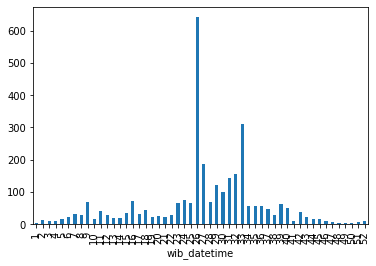

In [ ]:
df_3["wib_datetime"] = df_3["wib_datetime"].astype("datetime64")
df_3['name'].groupby(df_3["wib_datetime"].dt.week).count().plot(kind="bar")

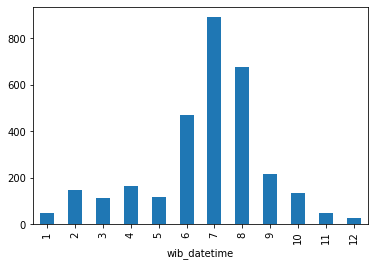

In [ ]:
df_3['name'].groupby(df_3["wib_datetime"].dt.month).count().plot(kind="bar")

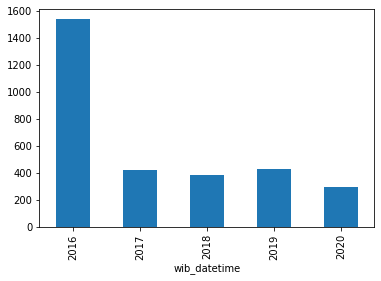

In [ ]:
df_3['name'].groupby(df_3["wib_datetime"].dt.year).count().plot(kind="bar")

Rumus Haversine dengan world pop

In [ ]:
import pandas as pd
populasi=pd.read_excel('/content/geonames-all-cities-with-a-population-500.xlsx')
kebakaran=pd.read_excel('/content/kuda.xlsx')

In [ ]:
populasi.head()

,Geoname ID,Name,ASCII Name,Alternate Names,Latitude,Longitude,Feature Class,Feature Code,Country Code,Country Code 2,Admin1 Code,Admin2 Code,Admin3 Code,Admin4 Code,Population,Elevation,DIgital Elevation Model,Timezone,Modification date,Country,Coordinates
0,8571689,Danauparis,Danauparis,Danauparis,2.41096,98.08537,P,PPLA3,ID,NaN,1,NaN,NaN,NaN,0,NaN,128,Asia/Jakarta,2013-07-08,Indonesia,"2.41096, 98.08537"
1,8572105,Lawepakam,Lawepakam,Lawepakam,3.30436,97.96793,P,PPLA3,ID,NaN,1,NaN,NaN,NaN,0,NaN,261,Asia/Jakarta,2013-07-08,Indonesia,"3.30436, 97.96793"
2,8750910,Bintang,Bintang,Bintang,2.13673,100.81392,P,PPLA4,ID,NaN,37,NaN,NaN,NaN,0,NaN,7,Asia/Jakarta,2014-04-08,Indonesia,"2.13673, 100.81392"
3,1214413,Natal,Natal,Natal,0.56320,99.10990,P,PPLA3,ID,NaN,26,NaN,NaN,NaN,0,NaN,3,Asia/Jakarta,2013-11-08,Indonesia,"0.5632, 99.1099"
4,1214448,Muara Sipongi,Muara Sipongi,"Moearasipongi,Muara Sipongi",0.56926,100.01266,P,PPLA3,ID,NaN,24,NaN,NaN,NaN,0,NaN,253,Asia/Jakarta,2013-11-08,Indonesia,"0.56926, 100.01266"


In [ ]:
kebakaran.head()

,Unnamed: 0,name,styleUrl,styleHash,wib_datetime,coordinat,provinsi,kabupaten,kecamatan,desa,satellite,brightness,confidence,visibility,longitude,latitude
0,306,Point35,#pnt18,76602fc3,2016-04-13 03:48:00,"2°28'56.588""N 99°46'23.990""E",Sumatera Utara,Labuhanbatu Utara,Kualuh Selatan,Tanjung Pasir,LPN-MODIS,0,73,1,99.773331,2.482386
1,313,Point42,#pnt16,402965a3,2016-04-15 18:54:00,"2°19'41.216""N 99°58'6.703""E",Sumatera Utara,Labuhanbatu,Bilah Hilir,Sidomulyo,LPN-MODIS,0,59,1,99.968529,2.328115
2,314,Point43,#pnt16,402965a3,2016-04-15 18:54:00,"2°19'45.952""N 99°57'34.514""E",Sumatera Utara,Labuhanbatu Utara,Aek Kuo,Aek Korsik,LPN-MODIS,0,61,1,99.959587,2.329431
3,275,Point4,#pnt16,402965a3,2016-04-15 18:57:00,"2°19'45.953""N 99°57'34.486""E",Sumatera Utara,Labuhanbatu Utara,Aek Kuo,Aek Korsik,LPN-MODIS,0,61,1,99.959579,2.329431
4,272,Point1,#pnt16,402965a3,2016-04-15 18:57:00,"2°19'41.217""N 99°58'6.703""E",Sumatera Utara,Labuhanbatu,Bilah Hilir,Sidomulyo,LPN-MODIS,0,59,1,99.968529,2.328116


In [ ]:
from math import radians, cos, sin, asin, sqrt
def dist(lat1, long1, lat2, long2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lat1, long1, lat2, long2 = map(radians, [lat1, long1, lat2, long2])
    # haversine formula 
    dlon = long2 - long1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km
def terdekat(lat, long):
    jarak = populasi.apply(lambda row: dist(lat, long, row['Latitude'], row['Longitude']), axis=1)
    return populasi.loc[jarak.idxmin(), 'Name']
kebakaran['Name'] = kebakaran.apply(lambda row: terdekat(row['latitude'], row['longitude']), axis=1)

In [ ]:
kebakaran

,Unnamed: 0,name,styleUrl,styleHash,wib_datetime,coordinat,provinsi,kabupaten,kecamatan,desa,satellite,brightness,confidence,visibility,longitude,latitude,Name
0,306,Point35,#pnt18,76602fc3,2016-04-13 03:48:00,"2°28'56.588""N 99°46'23.990""E",Sumatera Utara,Labuhanbatu Utara,Kualuh Selatan,Tanjung Pasir,LPN-MODIS,0,73,1,99.773331,2.482386,Aek Kanopan
1,313,Point42,#pnt16,402965a3,2016-04-15 18:54:00,"2°19'41.216""N 99°58'6.703""E",Sumatera Utara,Labuhanbatu,Bilah Hilir,Sidomulyo,LPN-MODIS,0,59,1,99.968529,2.328115,Rantau Prapat
2,314,Point43,#pnt16,402965a3,2016-04-15 18:54:00,"2°19'45.952""N 99°57'34.514""E",Sumatera Utara,Labuhanbatu Utara,Aek Kuo,Aek Korsik,LPN-MODIS,0,61,1,99.959587,2.329431,Rantau Prapat
3,275,Point4,#pnt16,402965a3,2016-04-15 18:57:00,"2°19'45.953""N 99°57'34.486""E",Sumatera Utara,Labuhanbatu Utara,Aek Kuo,Aek Korsik,LPN-MODIS,0,61,1,99.959579,2.329431,Rantau Prapat
4,272,Point1,#pnt16,402965a3,2016-04-15 18:57:00,"2°19'41.217""N 99°58'6.703""E",Sumatera Utara,Labuhanbatu,Bilah Hilir,Sidomulyo,LPN-MODIS,0,59,1,99.968529,2.328116,Rantau Prapat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3041,3002,Point13,#pnt1,35c6054e,2020-10-31 13:53:00,"1°23'15.283""N 99°50'13.797""E",Sumatera Utara,Padang Lawas,Barumun Tengah,Bara Batu,LPN-MODIS,0,79,1,99.837166,1.387579,Binanga
3042,3003,Point14,#pnt1,35c6054e,2020-10-31 13:53:00,"1°23'10.332""N 99°49'39.163""E",Sumatera Utara,Padang Lawas,Barumun Tengah,Gunung Manaon Ur,LPN-MODIS,0,79,1,99.827545,1.386203,Binanga
3043,3039,Point1,#pnt22,4ef2f241,2020-11-09 10:57:00,"0°51'17.861""N 99°33'53.954""E",Sumatera Utara,Mandailing Natal,Siabu,Bange,LPN-MODIS,0,79,1,99.564987,0.854961,Panyambungan
3044,3040,Point2,#pnt15,67424855,2020-11-16 13:55:00,"1°43'26.536""N 98°47'52.842""E",Sumatera Utara,Kota Sibolga,Sibolga Selatan,Pancuran Kerambil,LPN-MODIS,0,79,1,98.798012,1.724038,Sibolga


In [ ]:
kebakaran = pd.merge(kebakaran,populasi[['Name','Latitude','Longitude']],on='Name', how='left')
# Rename the new columns as both the columns has same name, and python gets confused 
kebakaran.head()

,Unnamed: 0,name,styleUrl,styleHash,wib_datetime,coordinat,provinsi,kabupaten,kecamatan,desa,satellite,brightness,confidence,visibility,longitude,latitude,Name,Latitude,Longitude
0,306,Point35,#pnt18,76602fc3,2016-04-13 03:48:00,"2°28'56.588""N 99°46'23.990""E",Sumatera Utara,Labuhanbatu Utara,Kualuh Selatan,Tanjung Pasir,LPN-MODIS,0,73,1,99.773331,2.482386,Aek Kanopan,2.5704,99.65340
1,313,Point42,#pnt16,402965a3,2016-04-15 18:54:00,"2°19'41.216""N 99°58'6.703""E",Sumatera Utara,Labuhanbatu,Bilah Hilir,Sidomulyo,LPN-MODIS,0,59,1,99.968529,2.328115,Rantau Prapat,2.3321,100.05205
2,314,Point43,#pnt16,402965a3,2016-04-15 18:54:00,"2°19'45.952""N 99°57'34.514""E",Sumatera Utara,Labuhanbatu Utara,Aek Kuo,Aek Korsik,LPN-MODIS,0,61,1,99.959587,2.329431,Rantau Prapat,2.3321,100.05205
3,275,Point4,#pnt16,402965a3,2016-04-15 18:57:00,"2°19'45.953""N 99°57'34.486""E",Sumatera Utara,Labuhanbatu Utara,Aek Kuo,Aek Korsik,LPN-MODIS,0,61,1,99.959579,2.329431,Rantau Prapat,2.3321,100.05205
4,272,Point1,#pnt16,402965a3,2016-04-15 18:57:00,"2°19'41.217""N 99°58'6.703""E",Sumatera Utara,Labuhanbatu,Bilah Hilir,Sidomulyo,LPN-MODIS,0,59,1,99.968529,2.328116,Rantau Prapat,2.3321,100.05205


In [ ]:
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km
# Creating a new column to generate the output by passing lat long information to Haversine Equation
kebakaran['distance'] = [haversine(kebakaran.longitude[i],kebakaran.latitude[i],kebakaran.Longitude[i],kebakaran.Latitude[i]) for i in range(len(kebakaran))]
kebakaran['distance'] = kebakaran['distance'].round(decimals=3)
# Printing the data table 
kebakaran.head()

,Unnamed: 0,name,styleUrl,styleHash,wib_datetime,coordinat,provinsi,kabupaten,kecamatan,desa,satellite,brightness,confidence,visibility,longitude,latitude,Name,Latitude,Longitude,distance
0,306,Point35,#pnt18,76602fc3,2016-04-13 03:48:00,"2°28'56.588""N 99°46'23.990""E",Sumatera Utara,Labuhanbatu Utara,Kualuh Selatan,Tanjung Pasir,LPN-MODIS,0,73,1,99.773331,2.482386,Aek Kanopan,2.5704,99.65340,16.531
1,313,Point42,#pnt16,402965a3,2016-04-15 18:54:00,"2°19'41.216""N 99°58'6.703""E",Sumatera Utara,Labuhanbatu,Bilah Hilir,Sidomulyo,LPN-MODIS,0,59,1,99.968529,2.328115,Rantau Prapat,2.3321,100.05205,9.290
2,314,Point43,#pnt16,402965a3,2016-04-15 18:54:00,"2°19'45.952""N 99°57'34.514""E",Sumatera Utara,Labuhanbatu Utara,Aek Kuo,Aek Korsik,LPN-MODIS,0,61,1,99.959587,2.329431,Rantau Prapat,2.3321,100.05205,10.277
3,275,Point4,#pnt16,402965a3,2016-04-15 18:57:00,"2°19'45.953""N 99°57'34.486""E",Sumatera Utara,Labuhanbatu Utara,Aek Kuo,Aek Korsik,LPN-MODIS,0,61,1,99.959579,2.329431,Rantau Prapat,2.3321,100.05205,10.278
4,272,Point1,#pnt16,402965a3,2016-04-15 18:57:00,"2°19'41.217""N 99°58'6.703""E",Sumatera Utara,Labuhanbatu,Bilah Hilir,Sidomulyo,LPN-MODIS,0,59,1,99.968529,2.328116,Rantau Prapat,2.3321,100.05205,9.290


In [ ]:
kebakaran.to_excel('tinggal_bmkg.xlsx')

In [ ]:
import pandas as pd
df = pd.read_excel('/content/laporan_iklim_harian.xlsx')
df = df.replace(8888, None)
df = df.replace(9999, None)
df['Tn'] = df['Tn'].fillna(df['Tn'].mean())
df['Tx'] = df['Tx'].fillna(df['Tx'].mean())
df['Tavg'] = df['Tavg'].fillna(df['Tavg'].mean())
df['RH_avg'] = df['RH_avg'].fillna(df['RH_avg'].mean())
df['RR'] = df['RR'].fillna(df['RR'].mean())
df['ss'] = df['ss'].fillna(df['ss'].mean())
df['ff_x'] = df['ff_x'].fillna(df['ff_x'].mean())
df['ff_avg'] = df['ff_avg'].fillna(df['ff_avg'].mean())
df

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ff_avg
0,01-01-2016,23.903458,31.680283,26.3,88.0,0.000000,3.1,5.0,2.0
1,02-01-2016,23.903458,31.680283,26.7,88.0,5.221755,0.8,6.0,2.0
2,03-01-2016,23.903458,31.680283,26.3,85.0,0.000000,2.4,6.0,2.0
3,04-01-2016,23.903458,31.680283,27.5,88.0,0.000000,7.5,6.0,3.0
4,05-01-2016,23.903458,31.680283,27.3,87.0,0.000000,7.7,5.0,2.0
...,...,...,...,...,...,...,...,...,...
1822,27-12-2020,23.600000,30.600000,26.8,89.0,10.900000,0.0,6.0,2.0
1823,28-12-2020,23.200000,31.680283,26.3,88.0,5.221755,8.2,4.0,2.0
1824,29-12-2020,23.100000,30.300000,27.0,87.0,5.221755,7.6,6.0,2.0
1825,30-12-2020,23.903458,29.800000,26.4,87.0,6.400000,1.4,3.0,2.0


In [ ]:
df_1= pd.read_excel('/content/tinggal_bmkg.xlsx')
df_1

,Unnamed: 0,Unnamed: 0.1,name,styleUrl,styleHash,wib_datetime,coordinat,provinsi,kabupaten,kecamatan,desa,satellite,brightness,confidence,visibility,longitude,latitude,Name,Latitude,Longitude,distance
0,0,306,Point35,#pnt18,76602fc3,2016-04-13 03:48:00,"2°28'56.588""N 99°46'23.990""E",Sumatera Utara,Labuhanbatu Utara,Kualuh Selatan,Tanjung Pasir,LPN-MODIS,0,73,1,99.773331,2.482386,Aek Kanopan,2.57040,99.65340,16.531
1,1,313,Point42,#pnt16,402965a3,2016-04-15 18:54:00,"2°19'41.216""N 99°58'6.703""E",Sumatera Utara,Labuhanbatu,Bilah Hilir,Sidomulyo,LPN-MODIS,0,59,1,99.968529,2.328115,Rantau Prapat,2.33210,100.05205,9.290
2,2,314,Point43,#pnt16,402965a3,2016-04-15 18:54:00,"2°19'45.952""N 99°57'34.514""E",Sumatera Utara,Labuhanbatu Utara,Aek Kuo,Aek Korsik,LPN-MODIS,0,61,1,99.959587,2.329431,Rantau Prapat,2.33210,100.05205,10.277
3,3,275,Point4,#pnt16,402965a3,2016-04-15 18:57:00,"2°19'45.953""N 99°57'34.486""E",Sumatera Utara,Labuhanbatu Utara,Aek Kuo,Aek Korsik,LPN-MODIS,0,61,1,99.959579,2.329431,Rantau Prapat,2.33210,100.05205,10.278
4,4,272,Point1,#pnt16,402965a3,2016-04-15 18:57:00,"2°19'41.217""N 99°58'6.703""E",Sumatera Utara,Labuhanbatu,Bilah Hilir,Sidomulyo,LPN-MODIS,0,59,1,99.968529,2.328116,Rantau Prapat,2.33210,100.05205,9.290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3041,3041,3002,Point13,#pnt1,35c6054e,2020-10-31 13:53:00,"1°23'15.283""N 99°50'13.797""E",Sumatera Utara,Padang Lawas,Barumun Tengah,Bara Batu,LPN-MODIS,0,79,1,99.837166,1.387579,Binanga,1.41006,99.77602,7.242
3042,3042,3003,Point14,#pnt1,35c6054e,2020-10-31 13:53:00,"1°23'10.332""N 99°49'39.163""E",Sumatera Utara,Padang Lawas,Barumun Tengah,Gunung Manaon Ur,LPN-MODIS,0,79,1,99.827545,1.386203,Binanga,1.41006,99.77602,6.312
3043,3043,3039,Point1,#pnt22,4ef2f241,2020-11-09 10:57:00,"0°51'17.861""N 99°33'53.954""E",Sumatera Utara,Mandailing Natal,Siabu,Bange,LPN-MODIS,0,79,1,99.564987,0.854961,Panyambungan,0.86510,99.55280,1.763
3044,3044,3040,Point2,#pnt15,67424855,2020-11-16 13:55:00,"1°43'26.536""N 98°47'52.842""E",Sumatera Utara,Kota Sibolga,Sibolga Selatan,Pancuran Kerambil,LPN-MODIS,0,79,1,98.798012,1.724038,Sibolga,1.74016,98.78117,2.592


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  1827 non-null   datetime64[ns]
 1   Tn       1827 non-null   float64       
 2   Tx       1827 non-null   float64       
 3   Tavg     1827 non-null   float64       
 4   RH_avg   1827 non-null   float64       
 5   RR       1827 non-null   float64       
 6   ss       1827 non-null   float64       
 7   ff_x     1827 non-null   float64       
 8   ff_avg   1827 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 128.6 KB


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3046 entries, 0 to 3045
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    3046 non-null   int64         
 1   Unnamed: 0.1  3046 non-null   int64         
 2   name          3046 non-null   object        
 3   styleUrl      3046 non-null   object        
 4   styleHash     3046 non-null   object        
 5   wib_datetime  3046 non-null   datetime64[ns]
 6   coordinat     3046 non-null   object        
 7   provinsi      3046 non-null   object        
 8   kabupaten     3046 non-null   object        
 9   kecamatan     3033 non-null   object        
 10  desa          3033 non-null   object        
 11  satellite     3046 non-null   object        
 12  brightness    3046 non-null   int64         
 13  confidence    3046 non-null   int64         
 14  visibility    3046 non-null   int64         
 15  longitude     3046 non-null   float64 

In [ ]:
df["Tanggal"]= pd.to_datetime(df["Tanggal"])

In [ ]:
df_1['Tanggal'] = df_1['wib_datetime'].dt.date

In [ ]:
df_1["Tanggal"]= pd.to_datetime(df_1["Tanggal"])

In [ ]:
df_1 = pd.merge(df_1,df[['Tanggal','Tn','Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ff_avg']],on='Tanggal', how='left')
# Rename the new columns as both the columns has same name, and python gets confused 
df_1.head()

,Unnamed: 0,Unnamed: 0.1,name,styleUrl,styleHash,wib_datetime,coordinat,provinsi,kabupaten,kecamatan,desa,satellite,brightness,confidence,visibility,longitude,latitude,Name,Latitude,Longitude,distance,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ff_avg
0,0,306,Point35,#pnt18,76602fc3,2016-04-13 03:48:00,"2°28'56.588""N 99°46'23.990""E",Sumatera Utara,Labuhanbatu Utara,Kualuh Selatan,Tanjung Pasir,LPN-MODIS,0,73,1,99.773331,2.482386,Aek Kanopan,2.5704,99.65340,16.531,2016-04-13,25.0,33.5,28.5,85.0,0.0,4.8,9.0,3.0
1,1,313,Point42,#pnt16,402965a3,2016-04-15 18:54:00,"2°19'41.216""N 99°58'6.703""E",Sumatera Utara,Labuhanbatu,Bilah Hilir,Sidomulyo,LPN-MODIS,0,59,1,99.968529,2.328115,Rantau Prapat,2.3321,100.05205,9.290,2016-04-15,25.0,32.6,27.8,84.0,0.0,8.9,5.0,2.0
2,2,314,Point43,#pnt16,402965a3,2016-04-15 18:54:00,"2°19'45.952""N 99°57'34.514""E",Sumatera Utara,Labuhanbatu Utara,Aek Kuo,Aek Korsik,LPN-MODIS,0,61,1,99.959587,2.329431,Rantau Prapat,2.3321,100.05205,10.277,2016-04-15,25.0,32.6,27.8,84.0,0.0,8.9,5.0,2.0
3,3,275,Point4,#pnt16,402965a3,2016-04-15 18:57:00,"2°19'45.953""N 99°57'34.486""E",Sumatera Utara,Labuhanbatu Utara,Aek Kuo,Aek Korsik,LPN-MODIS,0,61,1,99.959579,2.329431,Rantau Prapat,2.3321,100.05205,10.278,2016-04-15,25.0,32.6,27.8,84.0,0.0,8.9,5.0,2.0
4,4,272,Point1,#pnt16,402965a3,2016-04-15 18:57:00,"2°19'41.217""N 99°58'6.703""E",Sumatera Utara,Labuhanbatu,Bilah Hilir,Sidomulyo,LPN-MODIS,0,59,1,99.968529,2.328116,Rantau Prapat,2.3321,100.05205,9.290,2016-04-15,25.0,32.6,27.8,84.0,0.0,8.9,5.0,2.0


In [ ]:
df_1.to_excel('tinggal_proses.xlsx')

In [ ]:
import pandas as pd
df = pd.read_excel('/content/tinggal_proses.xlsx')
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,name,styleUrl,styleHash,wib_datetime,coordinat,provinsi,kabupaten,kecamatan,desa,satellite,brightness,confidence,visibility,longitude,latitude,Name,Latitude,Longitude,distance,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ff_avg
0,0,0,306,Point35,#pnt18,76602fc3,2016-04-13 03:48:00,"2°28'56.588""N 99°46'23.990""E",Sumatera Utara,Labuhanbatu Utara,Kualuh Selatan,Tanjung Pasir,LPN-MODIS,0,73,1,99.773331,2.482386,Aek Kanopan,2.5704,99.65340,16.531,2016-04-13,25.0,33.5,28.5,85.0,0.0,4.8,9.0,3.0
1,1,1,313,Point42,#pnt16,402965a3,2016-04-15 18:54:00,"2°19'41.216""N 99°58'6.703""E",Sumatera Utara,Labuhanbatu,Bilah Hilir,Sidomulyo,LPN-MODIS,0,59,1,99.968529,2.328115,Rantau Prapat,2.3321,100.05205,9.290,2016-04-15,25.0,32.6,27.8,84.0,0.0,8.9,5.0,2.0
2,2,2,314,Point43,#pnt16,402965a3,2016-04-15 18:54:00,"2°19'45.952""N 99°57'34.514""E",Sumatera Utara,Labuhanbatu Utara,Aek Kuo,Aek Korsik,LPN-MODIS,0,61,1,99.959587,2.329431,Rantau Prapat,2.3321,100.05205,10.277,2016-04-15,25.0,32.6,27.8,84.0,0.0,8.9,5.0,2.0
3,3,3,275,Point4,#pnt16,402965a3,2016-04-15 18:57:00,"2°19'45.953""N 99°57'34.486""E",Sumatera Utara,Labuhanbatu Utara,Aek Kuo,Aek Korsik,LPN-MODIS,0,61,1,99.959579,2.329431,Rantau Prapat,2.3321,100.05205,10.278,2016-04-15,25.0,32.6,27.8,84.0,0.0,8.9,5.0,2.0
4,4,4,272,Point1,#pnt16,402965a3,2016-04-15 18:57:00,"2°19'41.217""N 99°58'6.703""E",Sumatera Utara,Labuhanbatu,Bilah Hilir,Sidomulyo,LPN-MODIS,0,59,1,99.968529,2.328116,Rantau Prapat,2.3321,100.05205,9.290,2016-04-15,25.0,32.6,27.8,84.0,0.0,8.9,5.0,2.0


In [ ]:
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0.1.1', 'name', 'styleUrl', 'styleHash', 'Tanggal', 'coordinat', 'provinsi', 'kecamatan', 'desa', 'satellite', 'Name', 'Latitude', 'Longitude'], axis=1)
df

,Unnamed: 0,wib_datetime,kabupaten,brightness,confidence,visibility,longitude,latitude,distance,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ff_avg
0,0,2016-04-13 03:48:00,Labuhanbatu Utara,0,73,1,99.773331,2.482386,16.531,25.0,33.5,28.5,85.0,0.0,4.8,9.0,3.0
1,1,2016-04-15 18:54:00,Labuhanbatu,0,59,1,99.968529,2.328115,9.290,25.0,32.6,27.8,84.0,0.0,8.9,5.0,2.0
2,2,2016-04-15 18:54:00,Labuhanbatu Utara,0,61,1,99.959587,2.329431,10.277,25.0,32.6,27.8,84.0,0.0,8.9,5.0,2.0
3,3,2016-04-15 18:57:00,Labuhanbatu Utara,0,61,1,99.959579,2.329431,10.278,25.0,32.6,27.8,84.0,0.0,8.9,5.0,2.0
4,4,2016-04-15 18:57:00,Labuhanbatu,0,59,1,99.968529,2.328116,9.290,25.0,32.6,27.8,84.0,0.0,8.9,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3041,3041,2020-10-31 13:53:00,Padang Lawas,0,79,1,99.837166,1.387579,7.242,24.4,31.1,27.1,90.0,18.2,9.6,6.0,3.0
3042,3042,2020-10-31 13:53:00,Padang Lawas,0,79,1,99.827545,1.386203,6.312,24.4,31.1,27.1,90.0,18.2,9.6,6.0,3.0
3043,3043,2020-11-09 10:57:00,Mandailing Natal,0,79,1,99.564987,0.854961,1.763,23.4,31.4,26.7,86.0,7.5,9.0,5.0,2.0
3044,3044,2020-11-16 13:55:00,Kota Sibolga,0,79,1,98.798012,1.724038,2.592,23.6,31.5,26.6,90.0,5.0,3.3,7.0,3.0


In [ ]:
df = df.rename(columns={'Unnamed: 0': 'No Kebakaran'})
df

,No Kebakaran,wib_datetime,kabupaten,brightness,confidence,visibility,longitude,latitude,distance,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ff_avg
0,0,2016-04-13 03:48:00,Labuhanbatu Utara,0,73,1,99.773331,2.482386,16.531,25.0,33.5,28.5,85.0,0.0,4.8,9.0,3.0
1,1,2016-04-15 18:54:00,Labuhanbatu,0,59,1,99.968529,2.328115,9.290,25.0,32.6,27.8,84.0,0.0,8.9,5.0,2.0
2,2,2016-04-15 18:54:00,Labuhanbatu Utara,0,61,1,99.959587,2.329431,10.277,25.0,32.6,27.8,84.0,0.0,8.9,5.0,2.0
3,3,2016-04-15 18:57:00,Labuhanbatu Utara,0,61,1,99.959579,2.329431,10.278,25.0,32.6,27.8,84.0,0.0,8.9,5.0,2.0
4,4,2016-04-15 18:57:00,Labuhanbatu,0,59,1,99.968529,2.328116,9.290,25.0,32.6,27.8,84.0,0.0,8.9,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3041,3041,2020-10-31 13:53:00,Padang Lawas,0,79,1,99.837166,1.387579,7.242,24.4,31.1,27.1,90.0,18.2,9.6,6.0,3.0
3042,3042,2020-10-31 13:53:00,Padang Lawas,0,79,1,99.827545,1.386203,6.312,24.4,31.1,27.1,90.0,18.2,9.6,6.0,3.0
3043,3043,2020-11-09 10:57:00,Mandailing Natal,0,79,1,99.564987,0.854961,1.763,23.4,31.4,26.7,86.0,7.5,9.0,5.0,2.0
3044,3044,2020-11-16 13:55:00,Kota Sibolga,0,79,1,98.798012,1.724038,2.592,23.6,31.5,26.6,90.0,5.0,3.3,7.0,3.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3046 entries, 0 to 3045
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   No Kebakaran  3046 non-null   int64         
 1   wib_datetime  3046 non-null   datetime64[ns]
 2   kabupaten     3046 non-null   object        
 3   brightness    3046 non-null   int64         
 4   confidence    3046 non-null   int64         
 5   visibility    3046 non-null   int64         
 6   longitude     3046 non-null   float64       
 7   latitude      3046 non-null   float64       
 8   distance      3046 non-null   float64       
 9   Tn            3046 non-null   float64       
 10  Tx            3046 non-null   float64       
 11  Tavg          3046 non-null   float64       
 12  RH_avg        3046 non-null   float64       
 13  RR            3046 non-null   float64       
 14  ss            3046 non-null   float64       
 15  ff_x          3046 non-null   float64 

In [ ]:
df.kabupaten.unique()

array(['Labuhanbatu Utara', 'Labuhanbatu', 'Karo', 'Labuhan Batu Selatan',
       'Deliserdang', 'Langkat', 'Tapanuli Utara', 'Tapanuli Tengah',
       'Padang Lawas', 'Kota Binjai', 'Mandailing Natal',
       'Tapanuli Selatan', 'Asahan', 'Kota Pematangsiantar', 'Samosir',
       'Pakpak Bharat', 'Dairi', 'Humbang Hasundutan',
       'Padang Lawas Utara', 'Nias Utara', 'Nias Selatan', 'Toba Samosir',
       'Simalungun', 'Tebing Tinggi', 'Kota Sibolga',
       'Kota Padangsidimpuan', 'Kota Medan', 'Kota Gunung Sitoli', 'Nias',
       'Serdang Bedagai', 'Tanjung Balai', 'Batubara'], dtype=object)

Kabupaten Batubara sama Kota Binjai Di Drop karena hanya satu

In [ ]:
dfneww = df[(df.kabupaten != 'Batubara' ) & (df.kabupaten != 'Kota Binjai')]

In [ ]:
dfneww.kabupaten.unique()

array(['Labuhanbatu Utara', 'Labuhanbatu', 'Karo', 'Labuhan Batu Selatan',
       'Deliserdang', 'Langkat', 'Tapanuli Utara', 'Tapanuli Tengah',
       'Padang Lawas', 'Mandailing Natal', 'Tapanuli Selatan', 'Asahan',
       'Kota Pematangsiantar', 'Samosir', 'Pakpak Bharat', 'Dairi',
       'Humbang Hasundutan', 'Padang Lawas Utara', 'Nias Utara',
       'Nias Selatan', 'Toba Samosir', 'Simalungun', 'Tebing Tinggi',
       'Kota Sibolga', 'Kota Padangsidimpuan', 'Kota Medan',
       'Kota Gunung Sitoli', 'Nias', 'Serdang Bedagai', 'Tanjung Balai'],
      dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib
dfnew = df[df.kabupaten != 'Kota Binjai']
dfneww = dfnew[dfnew.kabupaten != 'Batubara']
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

Model Random Forest Reg dan Decision Tree Reg

In [ ]:
df_sliced_dict = {}
 
for kab in dfneww['kabupaten'].unique():
    df_sliced_dict[kab] = dfnew[  dfnew['kabupaten'] == kab ]
    print(kab)
    X=df_sliced_dict[kab].drop(['longitude', 'latitude', 'confidence', 'kabupaten', 'No Kebakaran', 'wib_datetime'], axis=1)
    y=df_sliced_dict[kab]['confidence']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(X_train)
    test_scaled= scaler.transform(X_test)
    tree_model = DecisionTreeRegressor ()
    rf_model = RandomForestRegressor()
    tree_model.fit(train_scaled, y_train)
    rf_model.fit(train_scaled, y_train)
    tree_mse = mean_squared_error(y_train, tree_model.predict(train_scaled))
    tree_mae = mean_absolute_error(y_train, tree_model.predict(train_scaled))
    rf_mse = mean_squared_error(y_train, rf_model.predict(train_scaled))
    rf_mae = mean_absolute_error(y_train, rf_model.predict(train_scaled))
    tree_test_mse = mean_squared_error(y_test, tree_model.predict(test_scaled))
    tree_test_mae = mean_absolute_error(y_test, tree_model.predict(test_scaled))
    rf_test_mse = mean_squared_error(y_test, rf_model.predict(test_scaled))
    rf_test_mae = mean_absolute_error(y_test, rf_model.predict(test_scaled))
    import joblib
    filename = 'finalized_model_'+kab+'.sav'
    joblib.dump(tree_model, filename)
    print("Deci Tree mse=",tree_mse,"&mae=",tree_mae,".")
    print("RF mse=",rf_mse,"&mae=",rf_mae,".")
    print("Decision Tree test mse = ",tree_test_mse," & mae = ",tree_test_mae," & rmse = ", sqrt(tree_test_mse))
    print("Random Forest test mse = ",rf_test_mse," & mae = ",rf_test_mae," & rmse = ", sqrt(rf_test_mse))

Labuhanbatu Utara
Deci Tree mse= 0.0 &mae= 0.0 .
RF mse= 31.66785056179775 &mae= 3.581685393258426 .
Decision Tree test mse =  415.28205128205127  & mae =  13.333333333333334  & rmse =  20.37847028807735
Random Forest test mse =  211.09102051282048  & mae =  10.866666666666665  & rmse =  14.528971763783577
Labuhanbatu
Deci Tree mse= 0.1931464174454829 &mae= 0.08411214953271025 .
RF mse= 33.79839378739907 &mae= 4.296508678237649 .
Decision Tree test mse =  412.0054347826087  & mae =  15.26086956521739  & rmse =  20.297917006003566
Random Forest test mse =  293.63481203568347  & mae =  13.483887939958594  & rmse =  17.13577579322522
Karo
Deci Tree mse= 0.6795774647887324 &mae= 0.13380281690140844 .
RF mse= 45.23161979362285 &mae= 5.161357981220657 .
Decision Tree test mse =  903.4426229508197  & mae =  21.21311475409836  & rmse =  30.057322285107496
Random Forest test mse =  525.2976358948086  & mae =  18.011325136612022  & rmse =  22.91937250220452
Labuhan Batu Selatan
Deci Tree mse= 0.

In [ ]:
y_test

3017    79
1705    66
2876    38
Name: confidence, dtype: int64

In [ ]:
rf_model.predict(test_scaled)

array([66.58, 61.3 , 54.51])

Model Regresi Polinomial

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import numpy as np

In [ ]:
df_sliced_dict = {}
 
for kab in dfneww['kabupaten'].unique():
    df_sliced_dict[kab] = dfnew[  dfnew['kabupaten'] == kab ]
    print(kab)
    X=df_sliced_dict[kab].drop(['longitude', 'latitude', 'confidence', 'kabupaten', 'No Kebakaran', 'wib_datetime'], axis=1)
    y=df_sliced_dict[kab]['confidence']

    poly = PolynomialFeatures(degree=2)
    poly_variables = poly.fit_transform(X)

    poly_var_train, poly_var_test, res_train, res_test = train_test_split(poly_variables, y, test_size = 0.3, random_state = 4)

    regression = linear_model.LinearRegression()

    model = regression.fit(poly_var_train, res_train)
    score = model.score(poly_var_test, res_test)
   


Labuhanbatu Utara
Labuhanbatu
Karo
Labuhan Batu Selatan
Deliserdang
Langkat
Tapanuli Utara
Tapanuli Tengah
Padang Lawas
Mandailing Natal
Tapanuli Selatan
Asahan
Kota Pematangsiantar
Samosir
Pakpak Bharat
Dairi
Humbang Hasundutan
Padang Lawas Utara
Nias Utara
Nias Selatan
Toba Samosir
Simalungun
Tebing Tinggi
Kota Sibolga
Kota Padangsidimpuan
Kota Medan
Kota Gunung Sitoli
Nias
Serdang Bedagai
Tanjung Balai


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import operator

Labuhanbatu Utara
10.372036347499948
0.5567562260428908


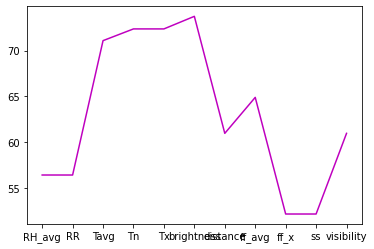

Labuhanbatu
15.998023374153403
0.2839703724947611


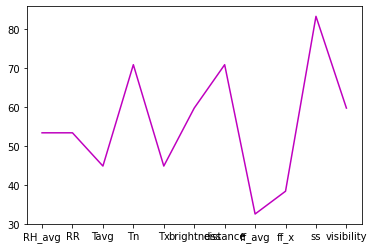

Karo
20.64616273709576
0.09633848888770136


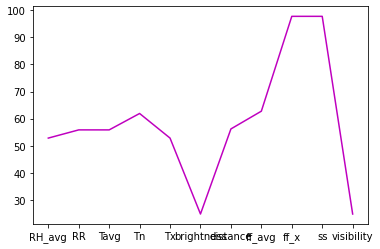

Labuhan Batu Selatan
19.455234393954196
0.005088273277554678


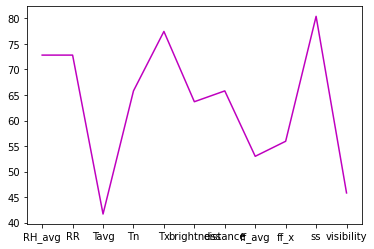

Deliserdang
1.7283446228175894
0.9917115551675872


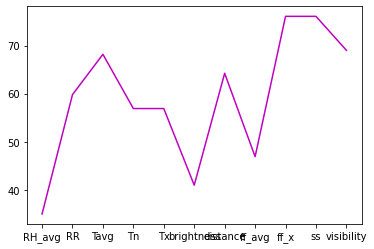

Langkat
5.97536062023114
0.8710344938912605


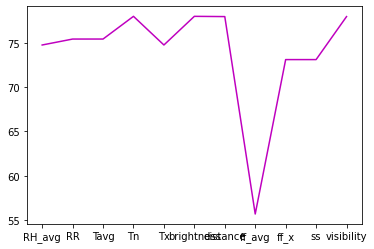

Tapanuli Utara
33.156469909342405
-2.361067770317697


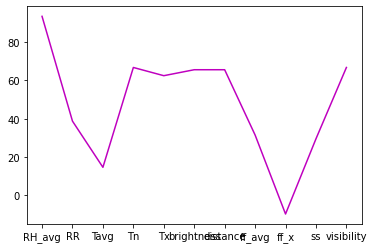

Tapanuli Tengah
16.951752061740674
0.42417101005894464


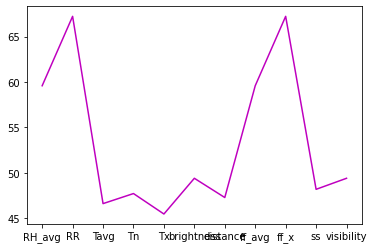

Padang Lawas
35.79224420147138
-2.249779758270126


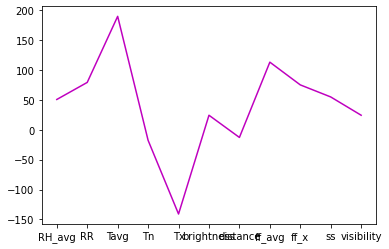

Mandailing Natal
21.497617388195795
-0.5559224970596193


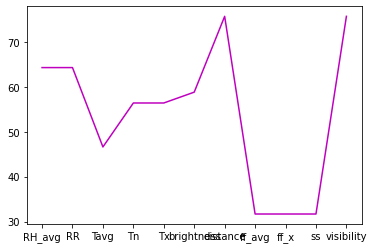

Tapanuli Selatan
13.336120150067508
0.3897413206385847


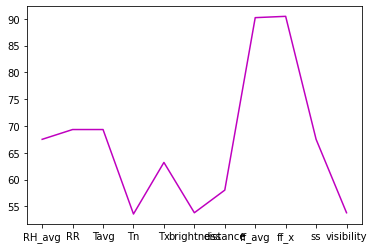

Asahan
5.13545318751523
0.8619792436859883


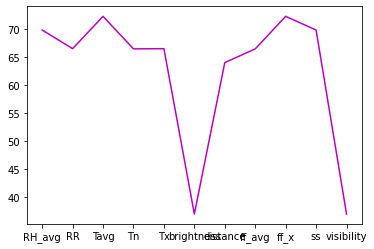

Kota Pematangsiantar
1.2169448930559316e-13
1.0


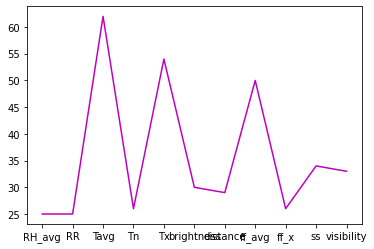

Samosir
15.186586528704233
0.4283429243963811


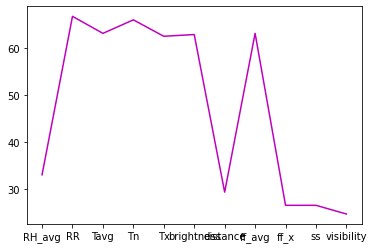

Pakpak Bharat
11.407547992011992
0.4096914198609426


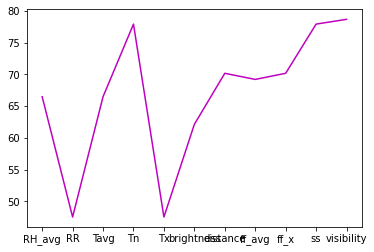

Dairi
7.070834365404569
0.8256066382232666


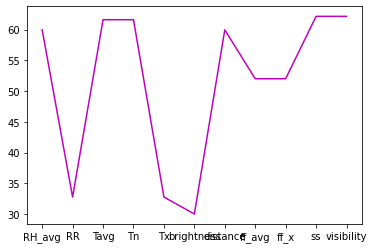

Humbang Hasundutan
14.2945157471716
0.365309993772994


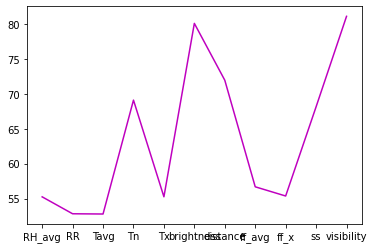

Padang Lawas Utara
14.666524543242751
0.44178661088287763


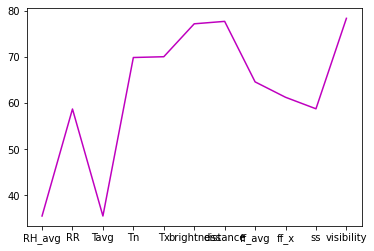

Nias Utara
1.1858360094634279e-12
1.0


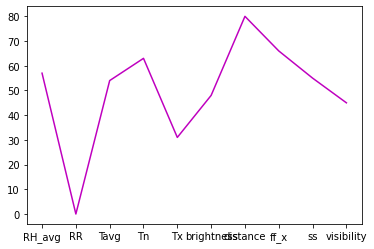

Nias Selatan
7.621171776065336e-11
1.0


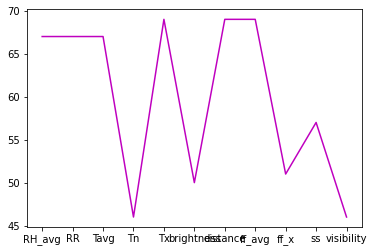

Toba Samosir
9.860346031152128
0.6928310277786823


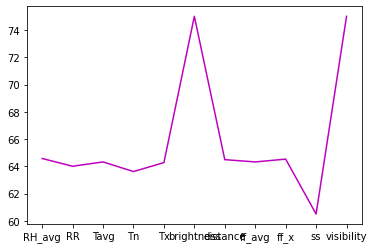

Simalungun
15.753680058674252
0.4029597928460338


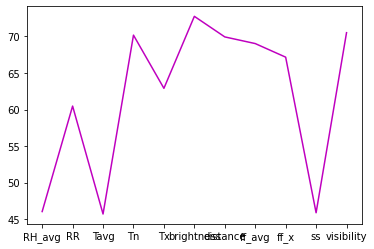

Tebing Tinggi
1.3451608044987588e-13
1.0


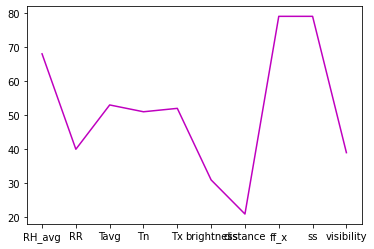

Kota Sibolga
3.34055252271718e-12
1.0


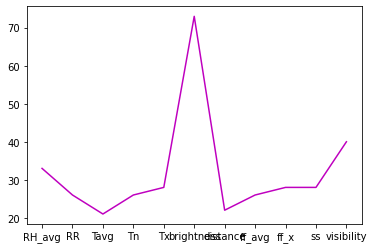

Kota Padangsidimpuan
2.6855991067210086e-14
1.0


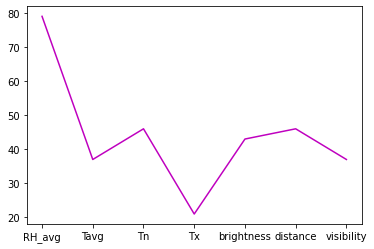

Kota Medan
1.844669092186125e-12
1.0


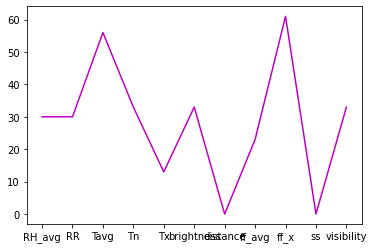

Kota Gunung Sitoli
2.2451351535586921e-13
1.0


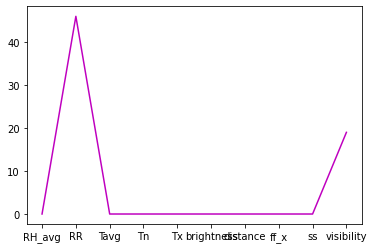

Nias
0.0
1.0


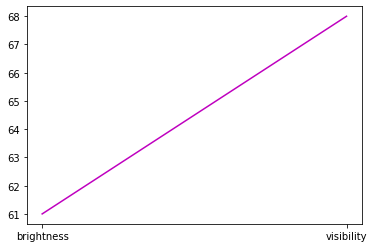

Serdang Bedagai
5.82471714435519e-14
1.0


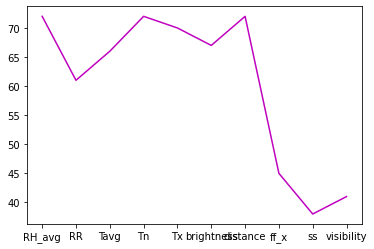

Tanjung Balai
2.1868099863321897e-13
1.0


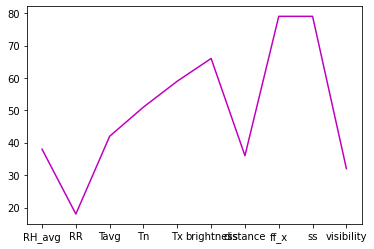

In [ ]:
for kab in dfneww['kabupaten'].unique():
    df_sliced_dict[kab] = dfnew[  dfnew['kabupaten'] == kab ]
    print(kab)
    x=df_sliced_dict[kab].drop(['longitude', 'latitude', 'confidence', 'kabupaten', 'No Kebakaran', 'wib_datetime'], axis=1)
    y=df_sliced_dict[kab]['confidence']

    # transforming the data to include another axis
    

    polynomial_features= PolynomialFeatures(degree=2)
    x_poly = polynomial_features.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)

    rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
    r2 = r2_score(y,y_poly_pred)
    print(rmse)
    print(r2)

    
    # sort the values of x before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
    x, y_poly_pred = zip(*sorted_zip)
    plt.plot(x, y_poly_pred, color='m')
    plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree):
  for kab in dfneww['kabupaten'].unique():
    df_sliced_dict[kab] = dfnew[  dfnew['kabupaten'] == kab ]
    print(kab)
    X=df_sliced_dict[kab].drop(['longitude', 'latitude', 'confidence', 'kabupaten', 'No Kebakaran', 'wib_datetime'], axis=1)
    y=df_sliced_dict[kab]['confidence']
    from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    "Creates a polynomial regression model for the given degree"
    
    poly_features = PolynomialFeatures(degree=degree)
    
    # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)
    
    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, Y_train)
    
    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)
    
    # predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
    
    # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
    r2_train = r2_score(Y_train, y_train_predicted)
    
    # evaluating the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
    r2_test = r2_score(Y_test, y_test_predict)
    
    print("The model performance for the training set")
    print("-------------------------------------------")
    print("RMSE of training set is {}".format(rmse_train))
    print("R2 score of training set is {}".format(r2_train))
    
    print("\n")
    
    print("The model performance for the test set")
    print("-------------------------------------------")
    print("RMSE of test set is {}".format(rmse_test))
    print("R2 score of test set is {}".format(r2_test))

In [ ]:
create_polynomial_regression_model(2)

Labuhanbatu Utara
The model performance for the training set
-------------------------------------------
RMSE of training set is 20.012569283259207
R2 score of training set is -0.6876888475470189


The model performance for the test set
-------------------------------------------
RMSE of test set is 104.61393828601439
R2 score of test set is -42.66823195548462
Labuhanbatu
The model performance for the training set
-------------------------------------------
RMSE of training set is 33.326230453318956
R2 score of training set is -2.0022071928675294


The model performance for the test set
-------------------------------------------
RMSE of test set is 44.735142601350965
R2 score of test set is -5.040680874222304
Karo
The model performance for the training set
-------------------------------------------
RMSE of training set is 43.907602166302226
R2 score of training set is -2.7342314233187066


The model performance for the test set
-------------------------------------------
RMSE of test

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
X=dfneww.drop(['longitude', 'latitude', 'confidence', 'kabupaten', 'No Kebakaran', 'wib_datetime'], axis=1)
y=dfneww['confidence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled= scaler.transform(X_test)
tree_model = DecisionTreeRegressor ()
rf_model = RandomForestRegressor()
tree_model.fit(train_scaled, y_train)
rf_model.fit(train_scaled, y_train)
tree_mse = mean_squared_error(y_train, tree_model.predict(train_scaled))
tree_mae = mean_absolute_error(y_train, tree_model.predict(train_scaled))
rf_mse = mean_squared_error(y_train, rf_model.predict(train_scaled))
rf_mae = mean_absolute_error(y_train, rf_model.predict(train_scaled))
tree_test_mse = mean_squared_error(y_test, tree_model.predict(test_scaled))
tree_test_mae = mean_absolute_error(y_test, tree_model.predict(test_scaled))
rf_test_mse = mean_squared_error(y_test, rf_model.predict(test_scaled))
rf_test_mae = mean_absolute_error(y_test, rf_model.predict(test_scaled))
print("Deci Tree mse=",tree_mse,"&mae=",tree_mae,".")
print("RF mse=",rf_mse,"&mae=",rf_mae,".")
print("Decision Tree test mse = ",tree_test_mse," & mae = ",tree_test_mae," & rmse = ", sqrt(tree_test_mse))
print("Random Forest test mse = ",rf_test_mse," & mae = ",rf_test_mae," & rmse = ", sqrt(rf_test_mse))

Deci Tree mse= 0.1822378716744914 &mae= 0.036463223787167445 .
RF mse= 46.93877160253843 &mae= 4.964643270735524 .
Decision Tree test mse =  484.18927789934355  & mae =  14.717724288840262  & rmse =  22.00430134994846
Random Forest test mse =  335.4798083184148  & mae =  13.583433104095029  & rmse =  18.316107892191912


Analisis Korelasi

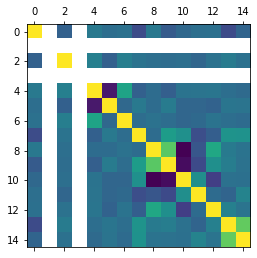

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(df.corr())
plt.show()

In [ ]:
df.head()

,No Kebakaran,wib_datetime,kabupaten,brightness,confidence,visibility,longitude,latitude,distance,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ff_avg
0,0,2016-04-13 03:48:00,Labuhanbatu Utara,0,73,1,99.773331,2.482386,16.531,25.0,33.5,28.5,85.0,0.0,4.8,9.0,3.0
1,1,2016-04-15 18:54:00,Labuhanbatu,0,59,1,99.968529,2.328115,9.290,25.0,32.6,27.8,84.0,0.0,8.9,5.0,2.0
2,2,2016-04-15 18:54:00,Labuhanbatu Utara,0,61,1,99.959587,2.329431,10.277,25.0,32.6,27.8,84.0,0.0,8.9,5.0,2.0
3,3,2016-04-15 18:57:00,Labuhanbatu Utara,0,61,1,99.959579,2.329431,10.278,25.0,32.6,27.8,84.0,0.0,8.9,5.0,2.0
4,4,2016-04-15 18:57:00,Labuhanbatu,0,59,1,99.968529,2.328116,9.290,25.0,32.6,27.8,84.0,0.0,8.9,5.0,2.0


In [ ]:
df = df.drop(['No Kebakaran','wib_datetime','kabupaten','brightness','visibility'], axis=1)
df

,confidence,longitude,latitude,distance,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ff_avg
0,73,99.773331,2.482386,16.531,25.0,33.5,28.5,85.0,0.0,4.8,9.0,3.0
1,59,99.968529,2.328115,9.290,25.0,32.6,27.8,84.0,0.0,8.9,5.0,2.0
2,61,99.959587,2.329431,10.277,25.0,32.6,27.8,84.0,0.0,8.9,5.0,2.0
3,61,99.959579,2.329431,10.278,25.0,32.6,27.8,84.0,0.0,8.9,5.0,2.0
4,59,99.968529,2.328116,9.290,25.0,32.6,27.8,84.0,0.0,8.9,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3041,79,99.837166,1.387579,7.242,24.4,31.1,27.1,90.0,18.2,9.6,6.0,3.0
3042,79,99.827545,1.386203,6.312,24.4,31.1,27.1,90.0,18.2,9.6,6.0,3.0
3043,79,99.564987,0.854961,1.763,23.4,31.4,26.7,86.0,7.5,9.0,5.0,2.0
3044,79,98.798012,1.724038,2.592,23.6,31.5,26.6,90.0,5.0,3.3,7.0,3.0


In [ ]:
df = df.drop(['longitude','latitude'], axis=1)

In [ ]:
df

,confidence,distance,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ff_avg
0,73,16.531,25.0,33.5,28.5,85.0,0.0,4.8,9.0,3.0
1,59,9.290,25.0,32.6,27.8,84.0,0.0,8.9,5.0,2.0
2,61,10.277,25.0,32.6,27.8,84.0,0.0,8.9,5.0,2.0
3,61,10.278,25.0,32.6,27.8,84.0,0.0,8.9,5.0,2.0
4,59,9.290,25.0,32.6,27.8,84.0,0.0,8.9,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...
3041,79,7.242,24.4,31.1,27.1,90.0,18.2,9.6,6.0,3.0
3042,79,6.312,24.4,31.1,27.1,90.0,18.2,9.6,6.0,3.0
3043,79,1.763,23.4,31.4,26.7,86.0,7.5,9.0,5.0,2.0
3044,79,2.592,23.6,31.5,26.6,90.0,5.0,3.3,7.0,3.0


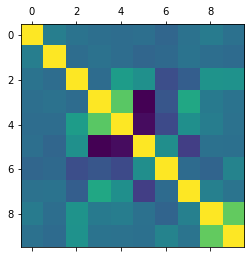

In [ ]:
plt.matshow(df.corr())
plt.show()

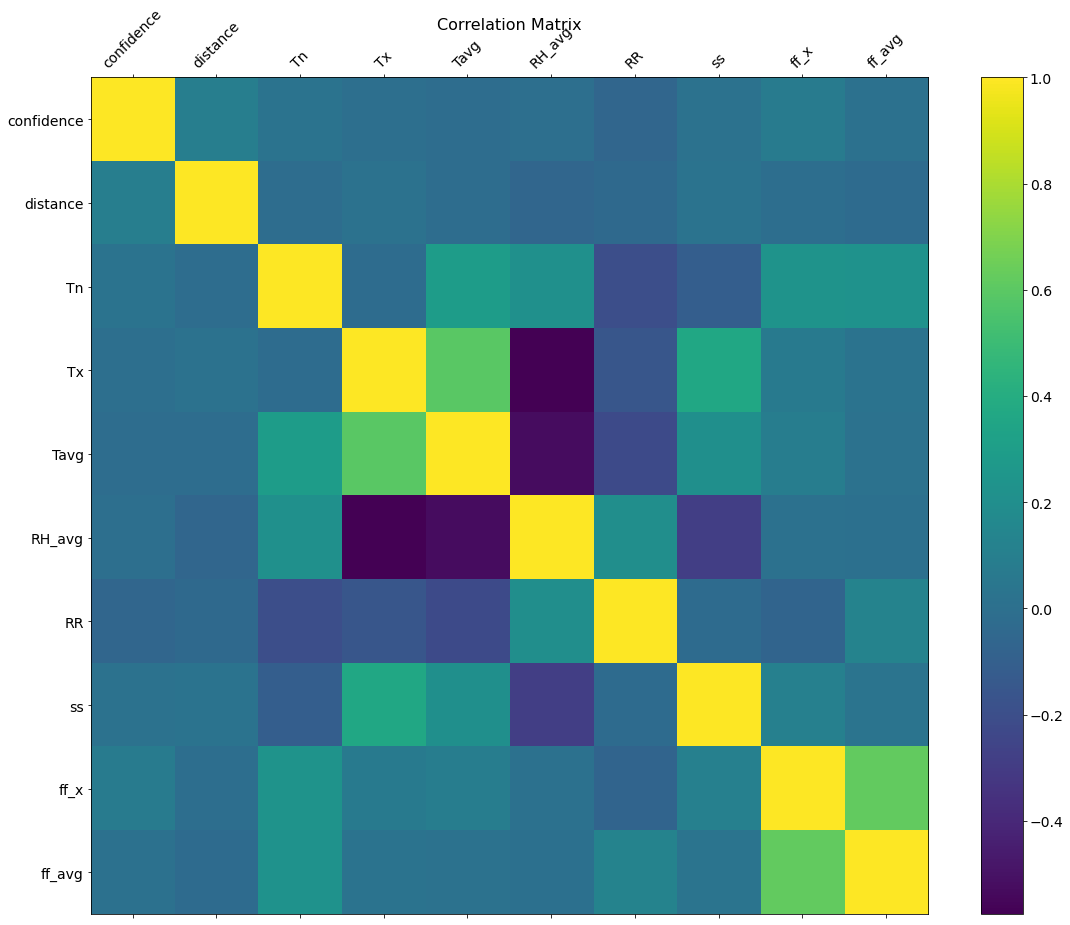

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:
df.to_excel('masukmodel.xlsx')

In [ ]:
df_input = pd.read_excel('/content/cuaca_final.xlsx')
df_input['distance'] = 1
df_input['brightness'] = 0
df_input['visibility'] = 1
df_input

,Unnamed: 0,ff_x avg,ff_avg avg,RH_avg avg,RR avg,ss avg,Tavg avg,Tn Avg,Tx Avg,cuaca,distance,brightness,visibility
0,2021-01-01,3.903896,2.347272,93.513980,5.110290,3.956212,26.377113,23.444407,30.926303,Mendung,1,0,1
1,2021-01-02,4.983804,2.330675,90.123964,7.017680,3.809297,26.413240,23.853542,30.261243,Hujan Deras,1,0,1
2,2021-01-03,3.987157,2.366858,91.099785,3.067526,2.778001,26.426811,24.351192,29.556928,Mendung,1,0,1
3,2021-01-04,5.987298,2.333109,90.849161,19.671873,3.980222,26.495965,24.665520,30.278011,Hujan Deras,1,0,1
4,2021-01-05,4.987304,2.365697,83.434552,0.241650,4.297612,26.500004,23.802192,30.983626,cerah,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2021-12-27,3.523023,2.354095,93.485899,4.569634,3.354781,26.201982,23.490586,30.389161,Mendung,1,0,1
361,2021-12-28,4.602931,2.354095,90.540690,5.898155,2.567077,26.244571,23.896635,30.098000,Mendung,1,0,1
362,2021-12-29,3.606284,2.354095,91.844249,3.181123,2.333467,26.225221,24.293720,28.528567,Mendung,1,0,1
363,2021-12-30,5.606425,2.354095,90.393821,26.349793,2.189787,26.313477,24.367873,29.916830,Hujan Deras,1,0,1


In [ ]:
input = df_input.drop(columns=['Unnamed: 0','cuaca'])
input

,ff_x avg,ff_avg avg,RH_avg avg,RR avg,ss avg,Tavg avg,Tn Avg,Tx Avg,distance,brightness,visibility
0,3.903896,2.347272,93.513980,5.110290,3.956212,26.377113,23.444407,30.926303,1,0,1
1,4.983804,2.330675,90.123964,7.017680,3.809297,26.413240,23.853542,30.261243,1,0,1
2,3.987157,2.366858,91.099785,3.067526,2.778001,26.426811,24.351192,29.556928,1,0,1
3,5.987298,2.333109,90.849161,19.671873,3.980222,26.495965,24.665520,30.278011,1,0,1
4,4.987304,2.365697,83.434552,0.241650,4.297612,26.500004,23.802192,30.983626,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
360,3.523023,2.354095,93.485899,4.569634,3.354781,26.201982,23.490586,30.389161,1,0,1
361,4.602931,2.354095,90.540690,5.898155,2.567077,26.244571,23.896635,30.098000,1,0,1
362,3.606284,2.354095,91.844249,3.181123,2.333467,26.225221,24.293720,28.528567,1,0,1
363,5.606425,2.354095,90.393821,26.349793,2.189787,26.313477,24.367873,29.916830,1,0,1


In [ ]:
df_sliced_dict = {}
 
for kab in dfneww['kabupaten'].unique():
    loaded_model = joblib.load('/content/finalized_model_'+kab+'.sav')
  
    
    result = loaded_model.predict(input)
    

    df_hasil = pd.DataFrame(result, columns = [kab])
    df_hasil['Tanggal'] = pd.date_range(start='1/1/2021', end='31/12/2021')
    df_hasil['Tanggal'] = pd.to_datetime(df_hasil['Tanggal'])
    df_hasil = df_hasil.set_index('Tanggal')
    df_hasil.to_excel('hasil_'+kab+'.xlsx')

    print(kab)
    print(result)
    

Labuhanbatu Utara
[65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65.
 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65.
 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65.
 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65.
 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65.
 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65.
 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65.
 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65.
 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65.
 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65.
 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65.
 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65.
 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65.
 65. 65. 65. 65. 65. 65. 65. 65. 